## Time Domain Features

### Data and Time

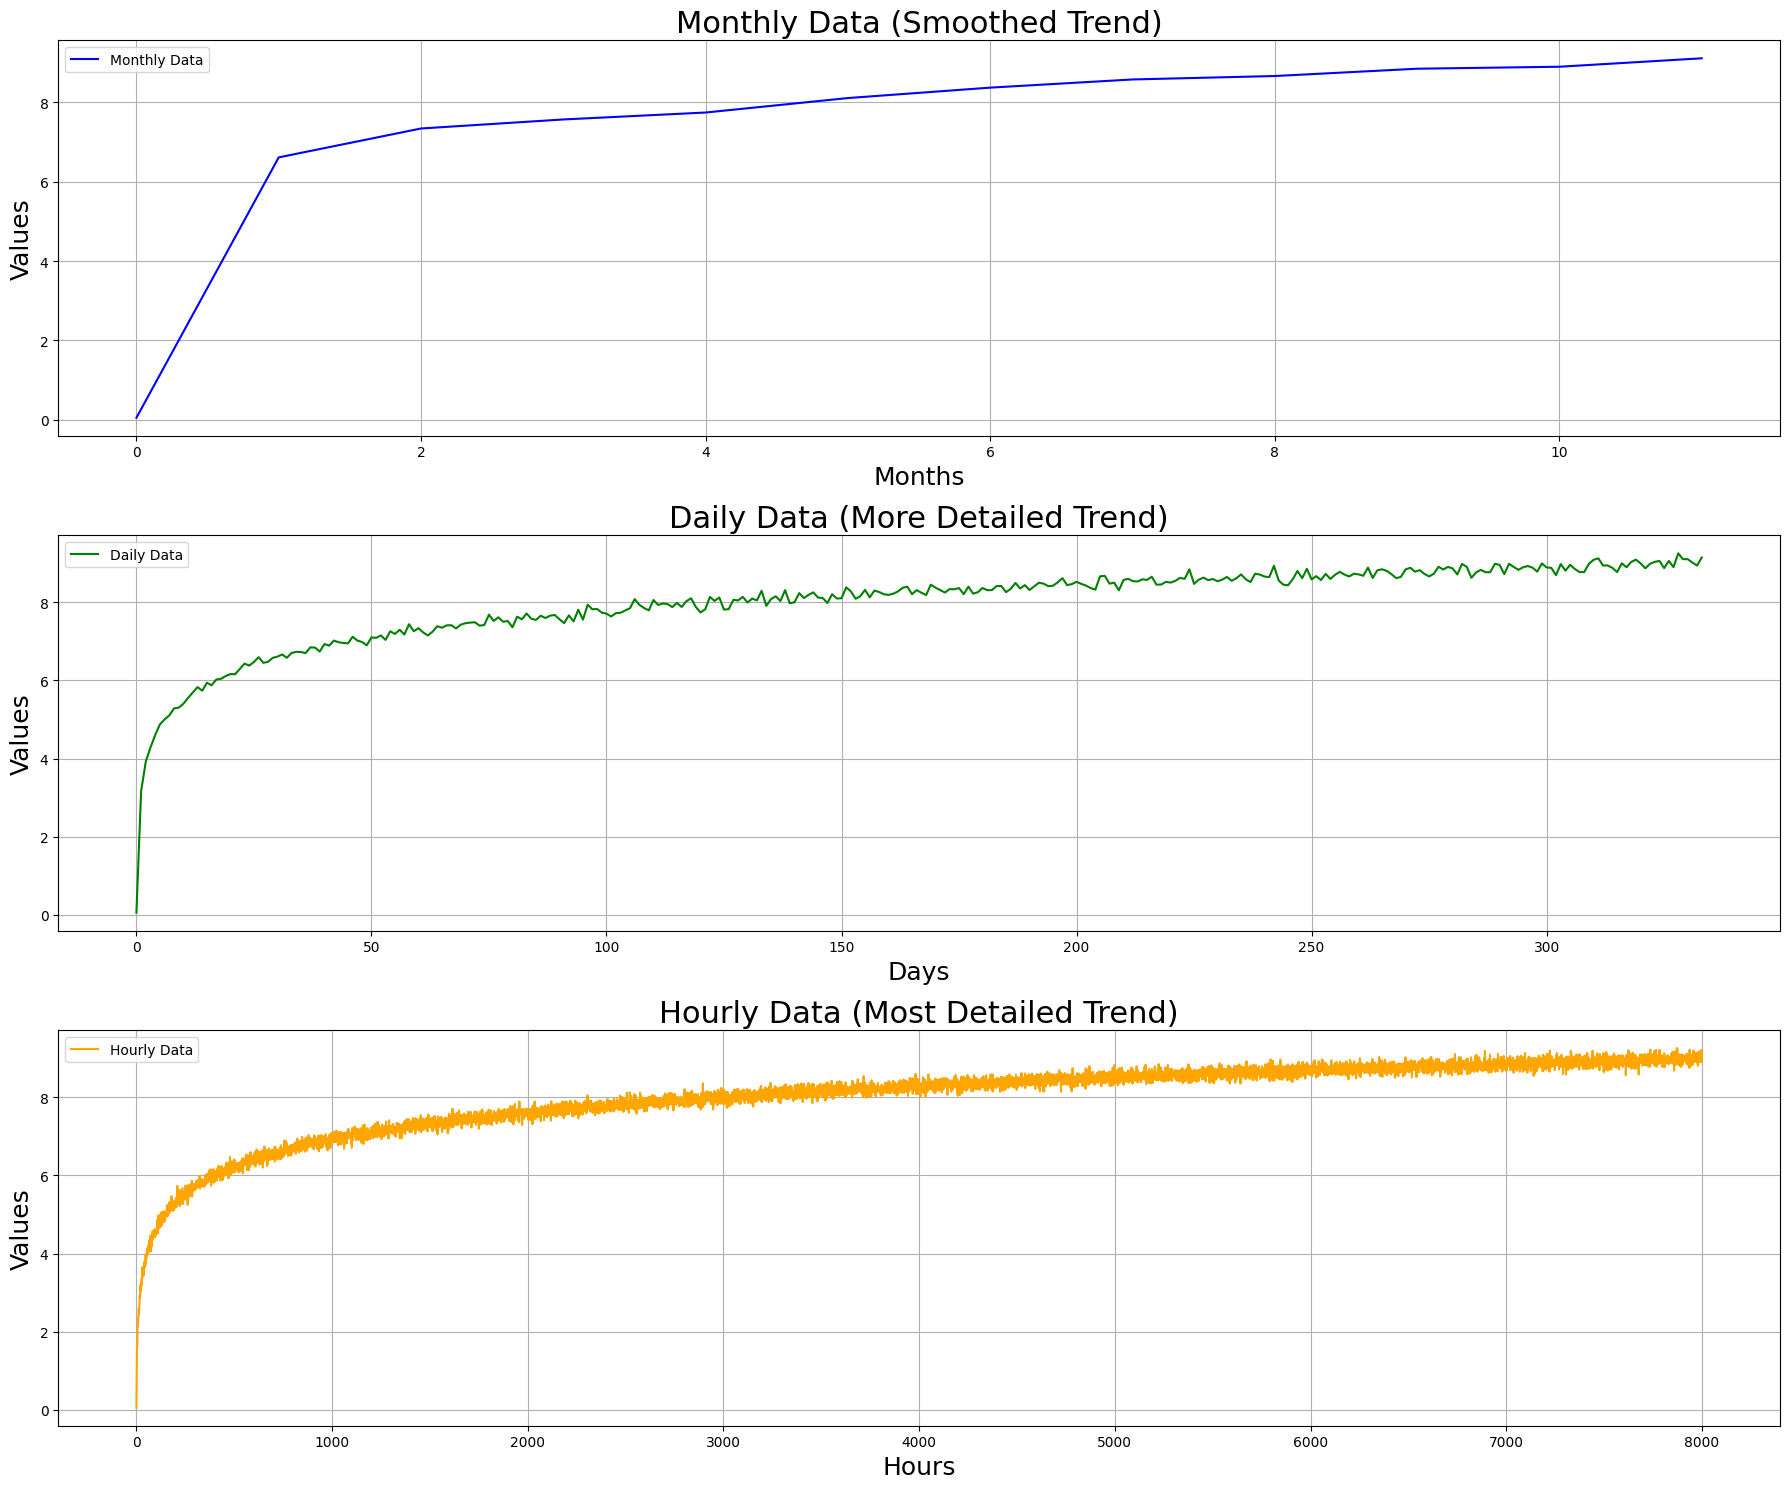

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example time series data (simulating an upward trend with added noise)
np.random.seed(42)
time_steps = np.arange(8000)
original_series = np.log(time_steps + 1) + 0.1 * np.random.randn(8000)

# Create data at different time scales: monthly, daily, hourly
monthly_data = original_series[::720]
daily_data = original_series[::24]
hourly_data = original_series[::1]

fig, axs = plt.subplots(3, 1, figsize=(18, 15))

axs[0].plot(np.arange(len(monthly_data)), monthly_data, label='Monthly Data', color='blue')
axs[0].set_title('Monthly Data (Smoothed Trend)', fontsize=22)
axs[0].set_xlabel('Months', fontsize=18)
axs[0].set_ylabel('Values', fontsize=18)
axs[0].legend()
axs[0].grid(True)

axs[1].plot(np.arange(len(daily_data)), daily_data, label='Daily Data', color='green')
axs[1].set_title('Daily Data (More Detailed Trend)', fontsize=22)
axs[1].set_xlabel('Days', fontsize=18)
axs[1].set_ylabel('Values', fontsize=18)
axs[1].legend()
axs[1].grid(True)

axs[2].plot(np.arange(len(hourly_data)), hourly_data, label='Hourly Data', color='orange')
axs[2].set_title('Hourly Data (Most Detailed Trend)', fontsize=22)
axs[2].set_xlabel('Hours', fontsize=18)
axs[2].set_ylabel('Values', fontsize=18)
axs[2].legend()
axs[2].grid(True)

# plt.savefig('test.png', dpi=300)

plt.tight_layout()
plt.show()


### Seasonal and Trend

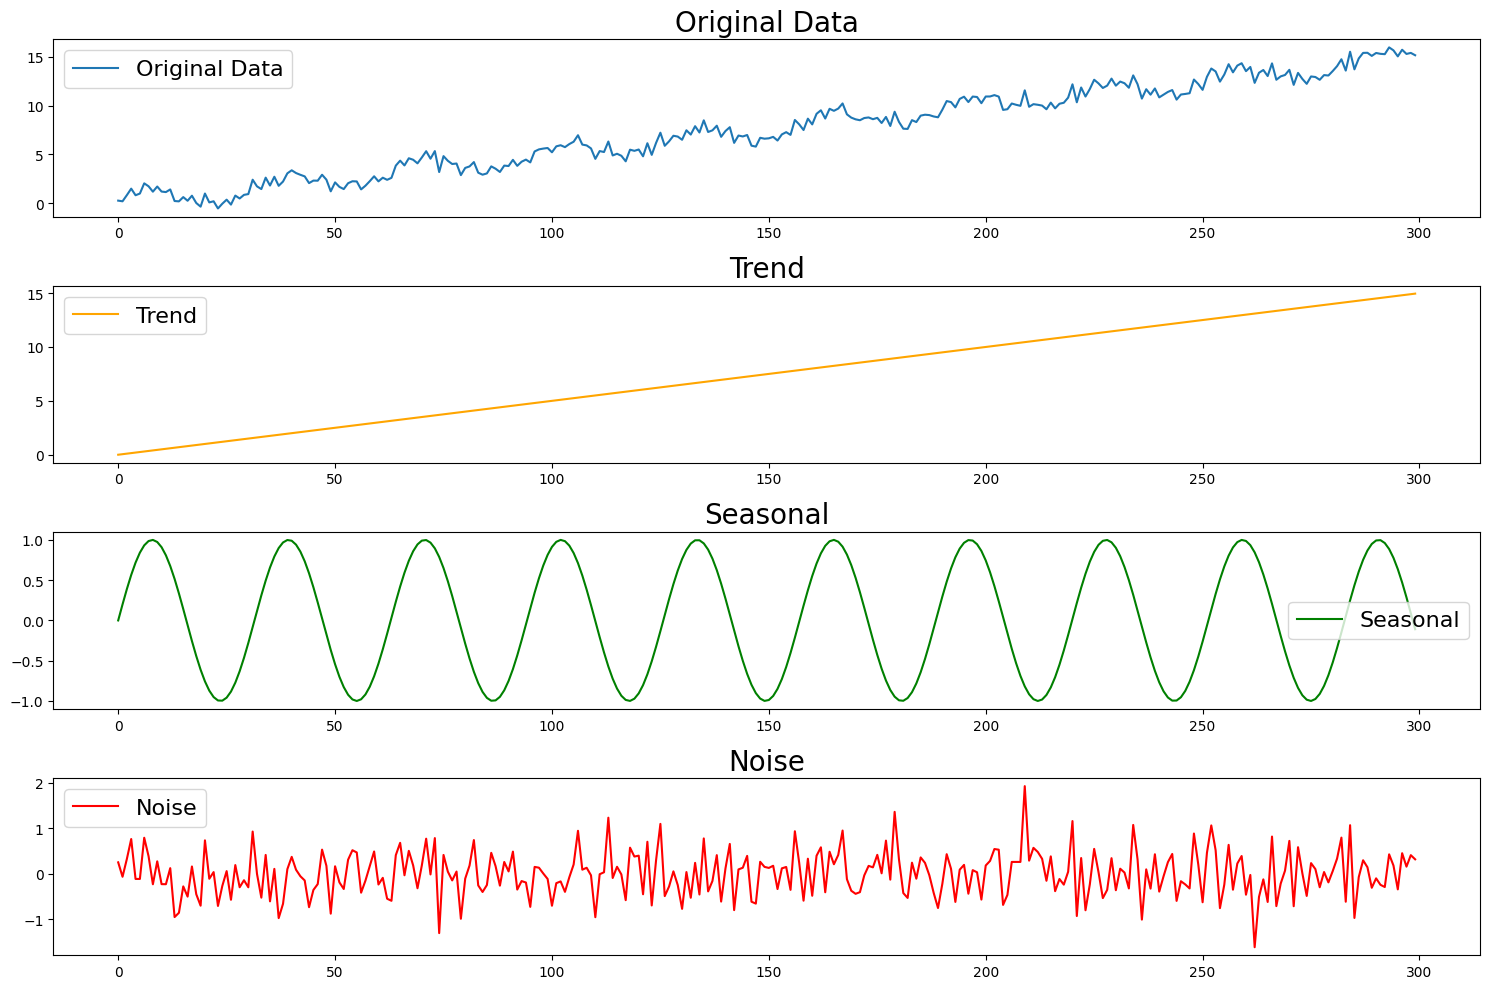

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
time_steps = np.arange(300)

# Trend
trend = 0.05 * time_steps

# Seasonal
seasonal = np.sin(time_steps / 5)

# Noise
noise = np.random.normal(0, 0.5, size=len(time_steps))

# Original Data = Trend + Seasonal + Noise
original_data = trend + seasonal + noise

# Original Data, Trend, Seasonal and Noise
plt.figure(figsize=(15, 10))

# Original Data
plt.subplot(4, 1, 1)
plt.plot(time_steps, original_data, label='Original Data')
plt.title('Original Data', fontsize=20)
plt.legend(fontsize=16)

# Trend
plt.subplot(4, 1, 2)
plt.plot(time_steps, trend, label='Trend', color='orange')
plt.title('Trend', fontsize=20)
plt.legend(fontsize=16)

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(time_steps, seasonal, label='Seasonal', color='green')
plt.title('Seasonal', fontsize=20)
plt.legend(fontsize=16)

# Noise
plt.subplot(4, 1, 4)
plt.plot(time_steps, noise, label='Noise', color='red')
plt.title('Noise', fontsize=20)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()


### Autocorrelation

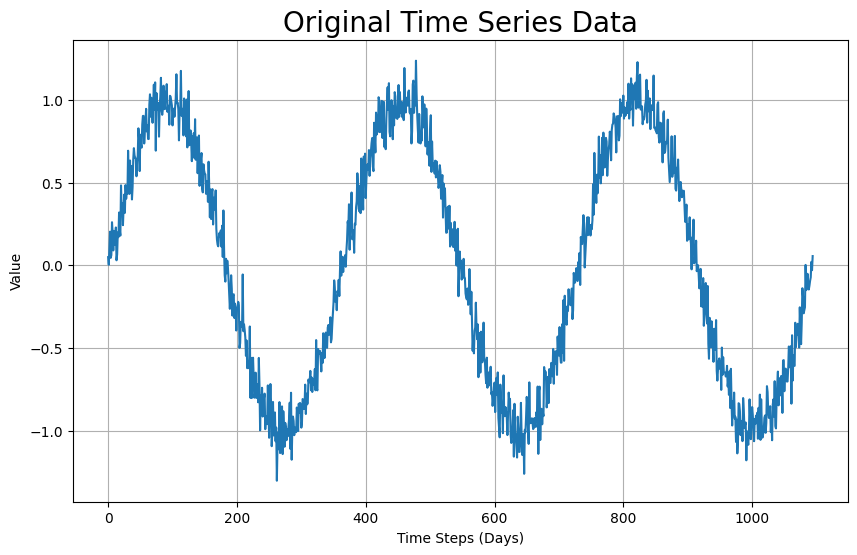

<Figure size 1000x600 with 0 Axes>

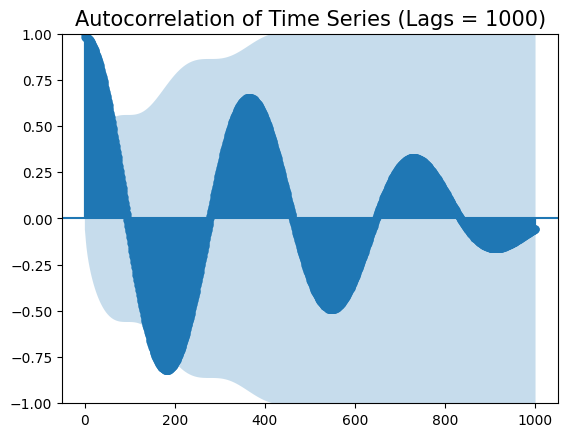

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(42)
time_steps = np.arange(0, 365 * 3)  
seasonal_data = np.sin(2 * np.pi * time_steps / 365) + 0.1 * np.random.randn(365 * 3)

seasonal_series = pd.Series(seasonal_data)

plt.figure(figsize=(10, 6))
plt.plot(time_steps, seasonal_data, label='Seasonal Data')
plt.title('Original Time Series Data', fontsize=20)
plt.xlabel('Time Steps (Days)')
plt.ylabel('Value')
# plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plot_acf(seasonal_series, lags=1000) 
plt.title('Autocorrelation of Time Series (Lags = 1000)', fontsize=15)
plt.show()


### Stationarity

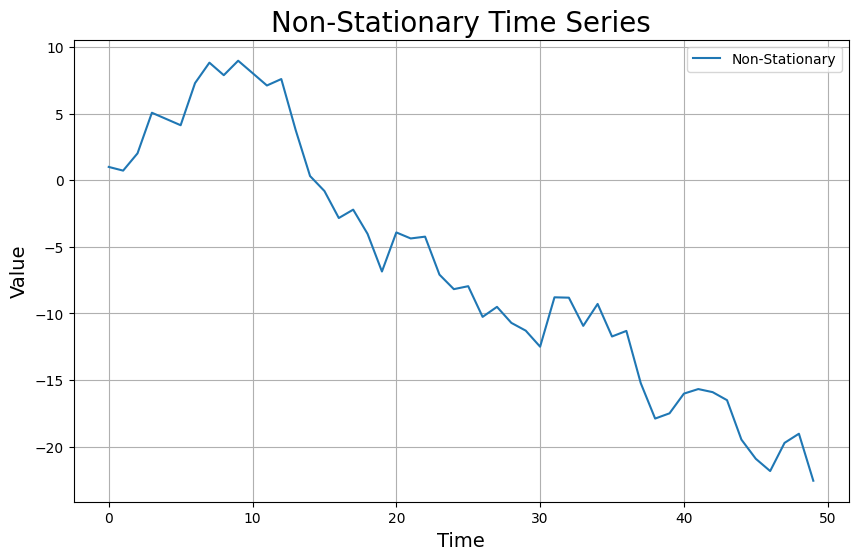

The P-Value: 0.9685564849768947


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

np.random.seed(42)
n = 50
non_stationary = np.cumsum(np.random.normal(0, 2, n))

plt.figure(figsize=(10, 6))
plt.plot(non_stationary, label='Non-Stationary')
plt.title('Non-Stationary Time Series', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

adf_result = adfuller(non_stationary)
print("The P-Value:", adf_result[1])

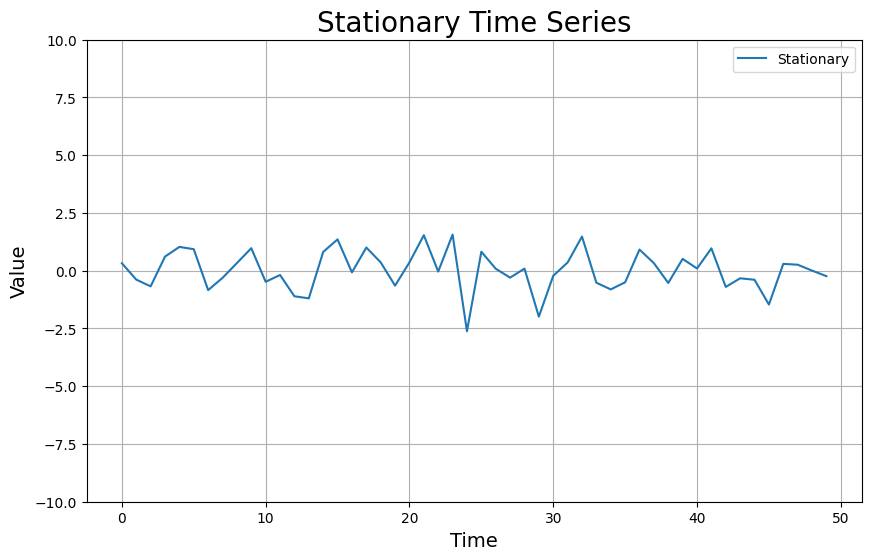

The P-Value: 3.188157037570127e-11


In [5]:
stationary = np.random.normal(0, 1, 50)

plt.figure(figsize=(10, 6))
plt.plot(stationary, label='Stationary')
plt.title('Stationary Time Series', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()

plt.ylim(-10, 10)

plt.grid(True)
plt.show()



adf_result = adfuller(stationary)
print("The P-Value:", adf_result[1])

### Differencing

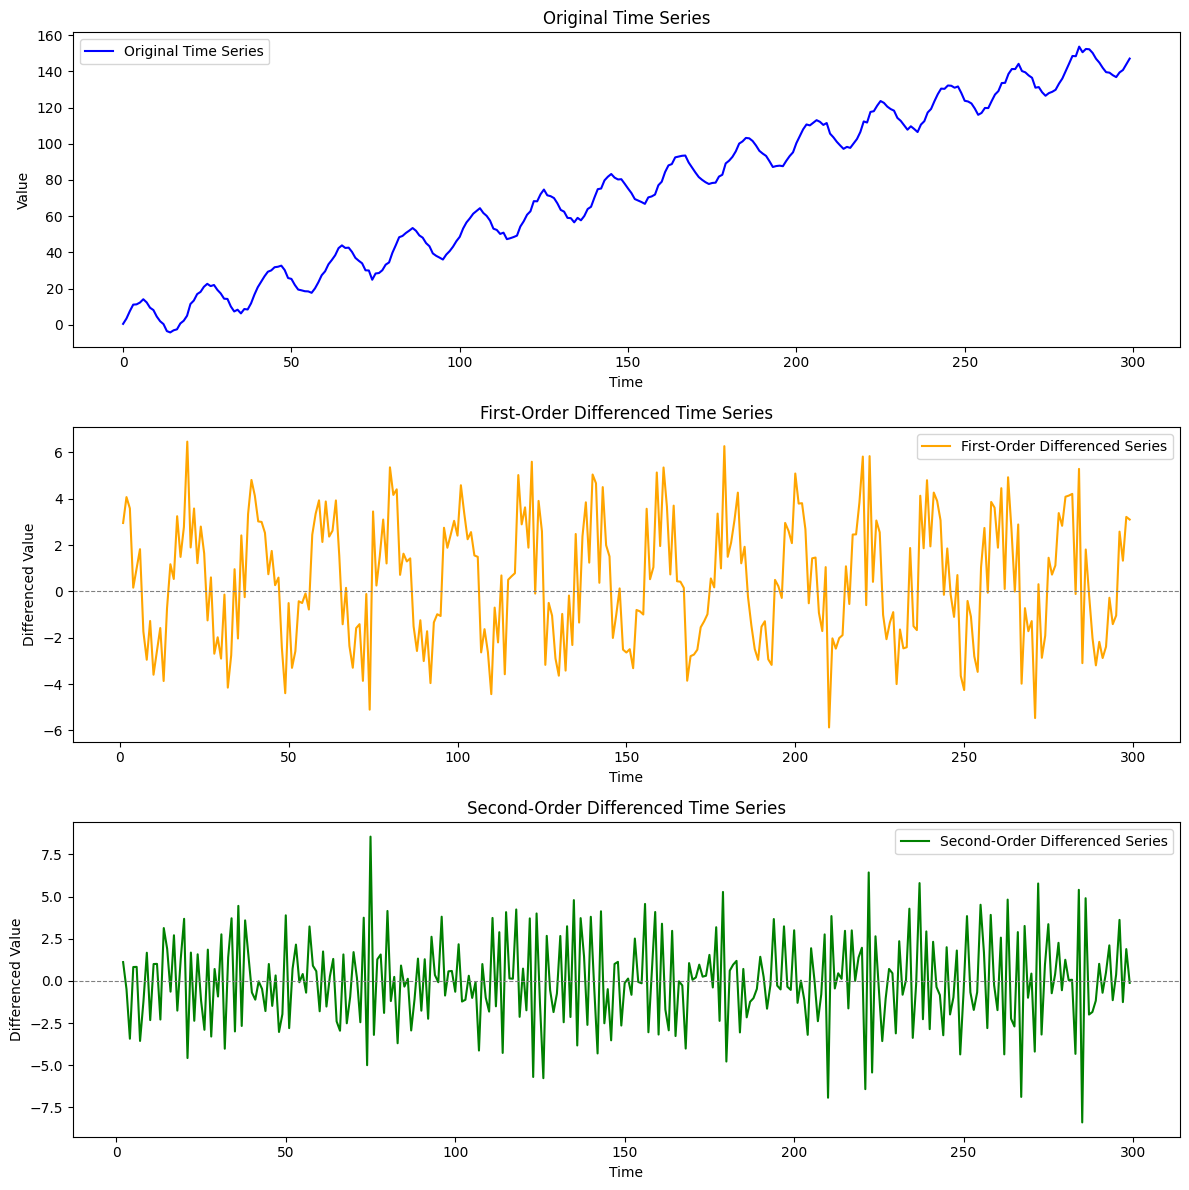

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic time series with a clear trend and seasonality
np.random.seed(42)
time = np.arange(300)
trend = 0.5 * time  # Linear trend
seasonality = 10 * np.sin(2 * np.pi * time / 20)  # Sinusoidal seasonality
noise = np.random.normal(0, 1, 300)  # Random noise
time_series = trend + seasonality + noise

# Perform first-order differencing
differenced_series_1 = np.diff(time_series, n=1)

# Perform second-order differencing
differenced_series_2 = np.diff(differenced_series_1, n=1)

# Plot the original time series, first-order, and second-order differenced series
plt.figure(figsize=(12, 12))

# Original time series
plt.subplot(3, 1, 1)
plt.plot(time, time_series, label='Original Time Series', color='blue')
plt.title('Original Time Series', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# First-order differenced time series
plt.subplot(3, 1, 2)
plt.plot(time[1:], differenced_series_1, label='First-Order Differenced Series', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('First-Order Differenced Time Series', fontsize=20)
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.ylim(-160, 160)
plt.legend()

# Second-order differenced time series
plt.subplot(3, 1, 3)
plt.plot(time[2:], differenced_series_2, label='Second-Order Differenced Series', color='green')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Second-Order Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Value')
plt.ylim(-160, 160)
plt.legend()

plt.tight_layout()
plt.show()
